In [1]:
import numpy as np
from glob import glob
from os import path

TEST_DATAST_PATH = 'Dataset/neutral/test'
file_names = glob(path.join(TEST_DATAST_PATH, '*.npz'))

In [26]:
idx = 8
data = np.load(file_names[idx])
print(data['relation_structure'])
image = data['image'].reshape(16, 160, 160)
target = data['target']

[[b'shape' b'position' b'OR']
 [b'line' b'type' b'OR']]


In [21]:
print(image[1].shape)

(160, 160)


In [3]:
def set_axis_color(ax, color):
    ax.spines['bottom'].set_color(color)
    ax.spines['top'].set_color(color)
    ax.spines['right'].set_color(color)
    ax.spines['left'].set_color(color)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)

In [4]:
import matplotlib.pyplot as plt


def plot_results(image, target, prediction):
    empty_image = np.ones((160, 160), dtype=np.int64)*254

    fig, axes = plt.subplots(6, 4)

    axes[0, 3].axis('off')
    axes[1, 3].axis('off')

    for i in range(4):
        axes[3,i].axis('off')

    axes[2, 3].axis('off')
    for x in range(6):
        for y in range(4):
            axes[x,y].xaxis.set_visible(False)
            axes[x,y].yaxis.set_visible(False)


    for i in range(8):
        x = i // 3
        y = i % 3
        
        axes[x, y].imshow(image[i], cmap='gray')
        x = i // 4
        y = i % 4
        axes[x + 4, y].imshow(image[8 + i], cmap='gray')

    axes[2, 2].imshow(empty_image, cmap='gray')
    if(target == prediction):
        x = target // 4
        y = target % 4
        set_axis_color(axes[x + 4, y], 'green')
    else:
        x = target // 4
        y = target % 4
        set_axis_color(axes[x + 4, y], 'green')
        x = prediction // 4
        y = prediction % 4
        set_axis_color(axes[x + 4, y], 'red')

    plt.show()


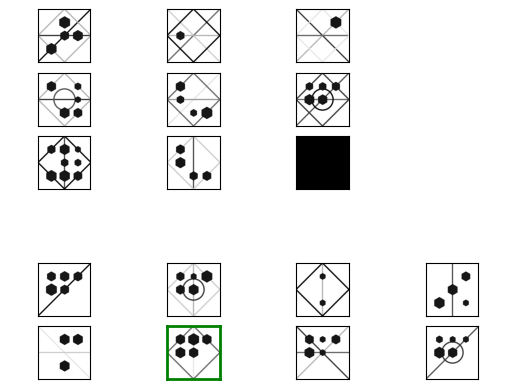

In [28]:
plot_results(image, target, 1)

In [16]:
from PIL import Image

image_uint8 = image.astype(np.uint8)
for i, panel in enumerate(image_uint8):
    #save image as grayscale png
    img = Image.fromarray(panel, mode='L')
    img.save('slika_{}.png'.format(i))